### TIME SERIES ANALYSIS of HCLTECH STOCK PRICE

##### About the Dataset: The dataset contains the information of stock prices of the company HCLTECH from 2000 to 2020.

Here's an explanation of each column:

Date: This column represents the date of the recorded data. Each row corresponds to a specific date.

Symbol: This column represents the symbol or ticker of the company or entity associated with the data. In this case, it appears to be "HCLTECH."

Series: This column represents the type of series or segment the data belongs to. In this case, it appears to be "EQ," which likely stands for equity.

Prev Close: This column represents the closing price of the stock or asset from the previous trading day.

Open: This column represents the opening price of the stock or asset for the given trading day.

High: This column represents the highest price reached by the stock or asset during the trading day.

Low: This column represents the lowest price reached by the stock or asset during the trading day.

Last: This column represents the last traded price of the stock or asset for the trading day.

Close: This column represents the closing price of the stock or asset for the trading day.

VWAP: This column represents the Volume Weighted Average Price, which is calculated by dividing the total value of all trades by the total trading volume for the day.

Volume: This column represents the trading volume, i.e., the total number of shares or contracts traded during the day.

Turnover: This column represents the total value of the trades executed during the day.

Trades: This column likely represents the number of trades that took place during the trading day.

Deliverable Volume: This column likely represents the volume of shares or contracts that were delivered or settled physically.

%Deliverble: This column represents the percentage of the total traded volume that corresponds to the deliverable volume.

##### Variable taken into consideration:

"Prev Close" and
"Date" Column has been considered as index 


##### Analysis Done:

The stock prices of HCLTech from January 2013 to December 2013 has been taken into consideration.

Actions taken:

i) Data Cleaning

ii) Treating missing values

iii) Visualizing actual time series


iv) Checked whether the time series is stationary using "Rolling Statistics"

v) After visualizing Found that the series is not stationary, so performed log transformation

vi) Again performed "Differencing" on the log transformed data to make the series stationary

vii) Visualized it and checked the stationarity of the differenced data using rolling statistics

viii) After making the time series stationary, Build a model using ARIMA.

ix) Used "ACF" and "PACF" to find out the order of Auto Regression(AR) and Moving Average(MA)

x) Train the model using ARIMA model with appropraite order

xi) Plotted the models's fitted value along with the differenced data

xi) Since, many  transformation were done, the original time series was taken back using cummulative sum and got transformed using exponential

xii) Plotted the ARIMA predictions along with the originl time series

xiii) Calculated RMSE to evaluate the model's performance.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("HCLTECH.csv")

In [3]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-11,HCLTECH,EQ,580.00,1550.0,1725.00,1492.00,1560.00,1554.45,1582.72,1192200,1.886915e+14,NaN,NaN,NaN
1,2000-01-12,HCLTECH,EQ,1554.45,1560.0,1678.85,1560.00,1678.85,1678.85,1657.05,344850,5.714349e+13,NaN,NaN,NaN
2,2000-01-13,HCLTECH,EQ,1678.85,1790.0,1813.20,1781.00,1813.20,1813.20,1804.69,53000,9.564880e+12,NaN,NaN,NaN
3,2000-01-14,HCLTECH,EQ,1813.20,1958.3,1958.30,1835.00,1958.30,1958.30,1939.90,270950,5.256169e+13,NaN,NaN,NaN
4,2000-01-17,HCLTECH,EQ,1958.30,2115.0,2115.00,1801.65,1801.65,1801.65,1990.55,428800,8.535473e+13,NaN,NaN,NaN


In [4]:
from statsmodels.tsa.arima_model import ARIMA

In [5]:
# Lets do some Data Cleaning

In [6]:
df=df.dropna()

In [7]:
df.isna().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [8]:
# Lets convert the date column to index

df.index= pd.to_datetime(df['Date'])

In [9]:
df.index

DatetimeIndex(['2011-06-01', '2011-06-02', '2011-06-03', '2011-06-06',
               '2011-06-07', '2011-06-08', '2011-06-09', '2011-06-10',
               '2011-06-13', '2011-06-14',
               ...
               '2020-11-14', '2020-11-17', '2020-11-18', '2020-11-19',
               '2020-11-20', '2020-11-23', '2020-11-24', '2020-11-25',
               '2020-11-26', '2020-11-27'],
              dtype='datetime64[ns]', name='Date', length=2354, freq=None)

In [10]:
df['Date']

Date
2011-06-01    2011-06-01
2011-06-02    2011-06-02
2011-06-03    2011-06-03
2011-06-06    2011-06-06
2011-06-07    2011-06-07
                 ...    
2020-11-23    2020-11-23
2020-11-24    2020-11-24
2020-11-25    2020-11-25
2020-11-26    2020-11-26
2020-11-27    2020-11-27
Name: Date, Length: 2354, dtype: object

In [11]:
df=df["Prev Close"]['2013-01-01':'2013-12-2']

In [12]:
df.sort_index(inplace= True)
df

Date
2013-01-01     618.70
2013-01-02     622.15
2013-01-03     625.25
2013-01-04     625.95
2013-01-07     634.05
               ...   
2013-11-26    1053.00
2013-11-27    1059.75
2013-11-28    1058.55
2013-11-29    1062.15
2013-12-02    1086.00
Name: Prev Close, Length: 230, dtype: float64

In [13]:
df.describe()

count     230.000000
mean      852.953478
std       156.484472
min       618.700000
25%       736.350000
50%       777.450000
75%      1023.962500
max      1161.150000
Name: Prev Close, dtype: float64

Text(0, 0.5, 'Stock prices for HCLTech')

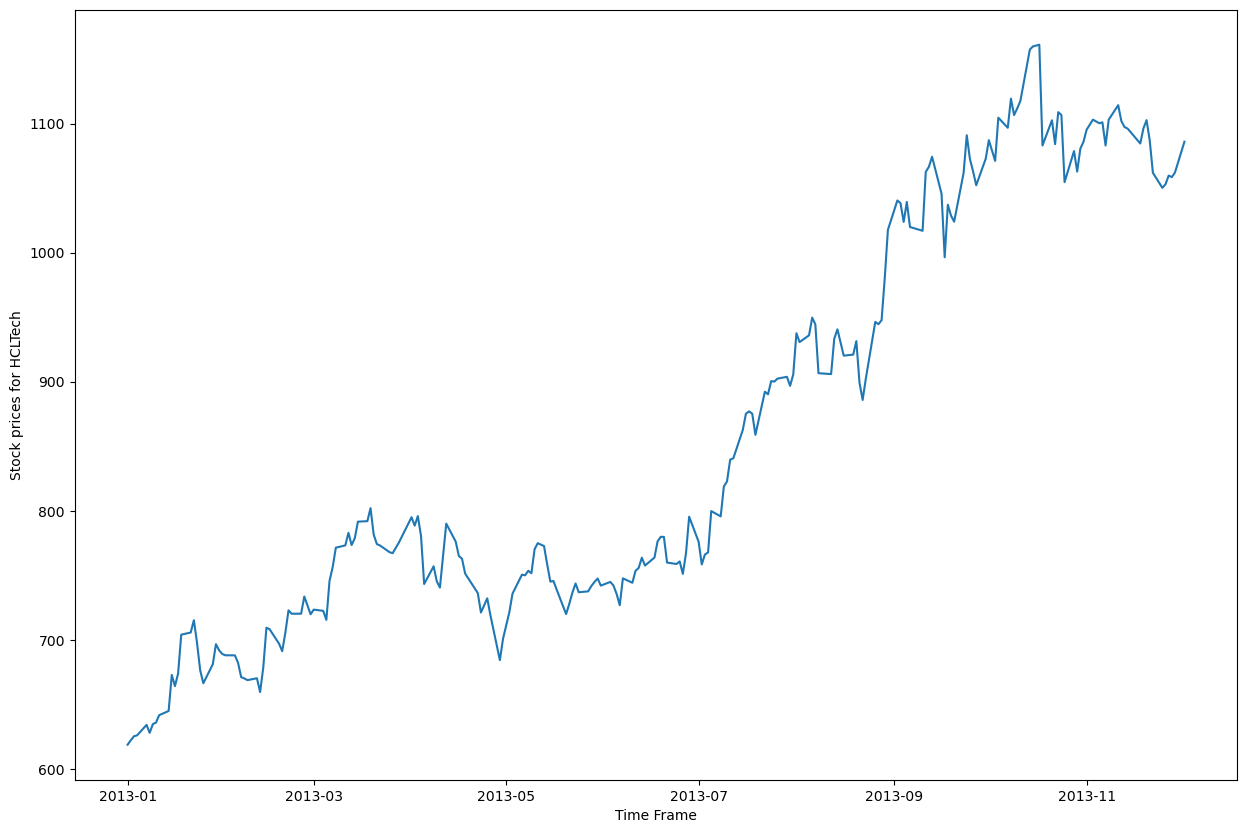

In [14]:
plt.figure(figsize=(15,10))
plt.plot(df)
plt.xlabel('Time Frame')
plt.ylabel('Stock prices for HCLTech')

In [15]:
# From the above chart, we can see an upward TREND but SAESONALITY component is not clear in the above chart.


In [16]:
# Now lets check whether our data is stationary or not.

In [17]:
# I shall check the stationarity using rolling statistics

In [18]:
rollingMean=df.rolling(12).mean()         # 12 entries has been taken together for finding rolling mean
rollingMean

Date
2013-01-01            NaN
2013-01-02            NaN
2013-01-03            NaN
2013-01-04            NaN
2013-01-07            NaN
                 ...     
2013-11-26    1087.383333
2013-11-27    1083.770833
2013-11-28    1079.125000
2013-11-29    1075.804167
2013-12-02    1074.854167
Name: Prev Close, Length: 230, dtype: float64

In [19]:
rollingSTD=df.rolling(12).std()
rollingSTD

Date
2013-01-01          NaN
2013-01-02          NaN
2013-01-03          NaN
2013-01-04          NaN
2013-01-07          NaN
                ...    
2013-11-26    21.094897
2013-11-27    21.856822
2013-11-28    20.670538
2013-11-29    19.846072
2013-12-02    18.971935
Name: Prev Close, Length: 230, dtype: float64

In [20]:
# Lets us visualize the same on a graph

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

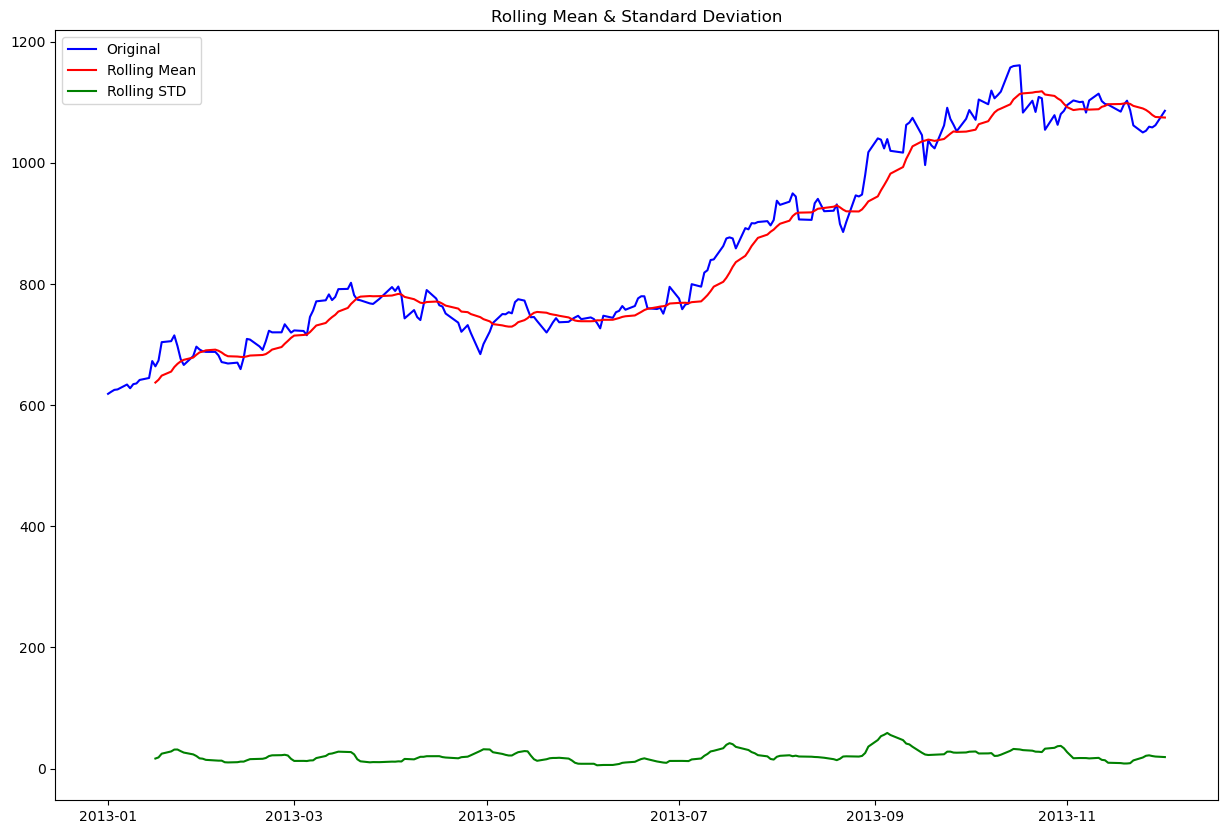

In [21]:
plt.figure(figsize=(15,10))
original=plt.plot(df,color='blue',label='Original')
mean=plt.plot(rollingMean, color='red', label='Rolling Mean')
std=plt.plot(rollingSTD,color='green',label='Rolling STD')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

In [22]:
# From above, it can be seen that rolling STD is constant but the rolling mean is not constant.

In [23]:
# And to train  model on this time series data, tt is mandatory to make the data stationary.

In [24]:
# Lers try log transformation and see if it could make the data stationary

In [25]:
import numpy as np

In [26]:
logTransform=np.log(df)
logTransform

Date
2013-01-01    6.427621
2013-01-02    6.433181
2013-01-03    6.438152
2013-01-04    6.439270
2013-01-07    6.452128
                ...   
2013-11-26    6.959399
2013-11-27    6.965788
2013-11-28    6.964655
2013-11-29    6.968050
2013-12-02    6.990257
Name: Prev Close, Length: 230, dtype: float64

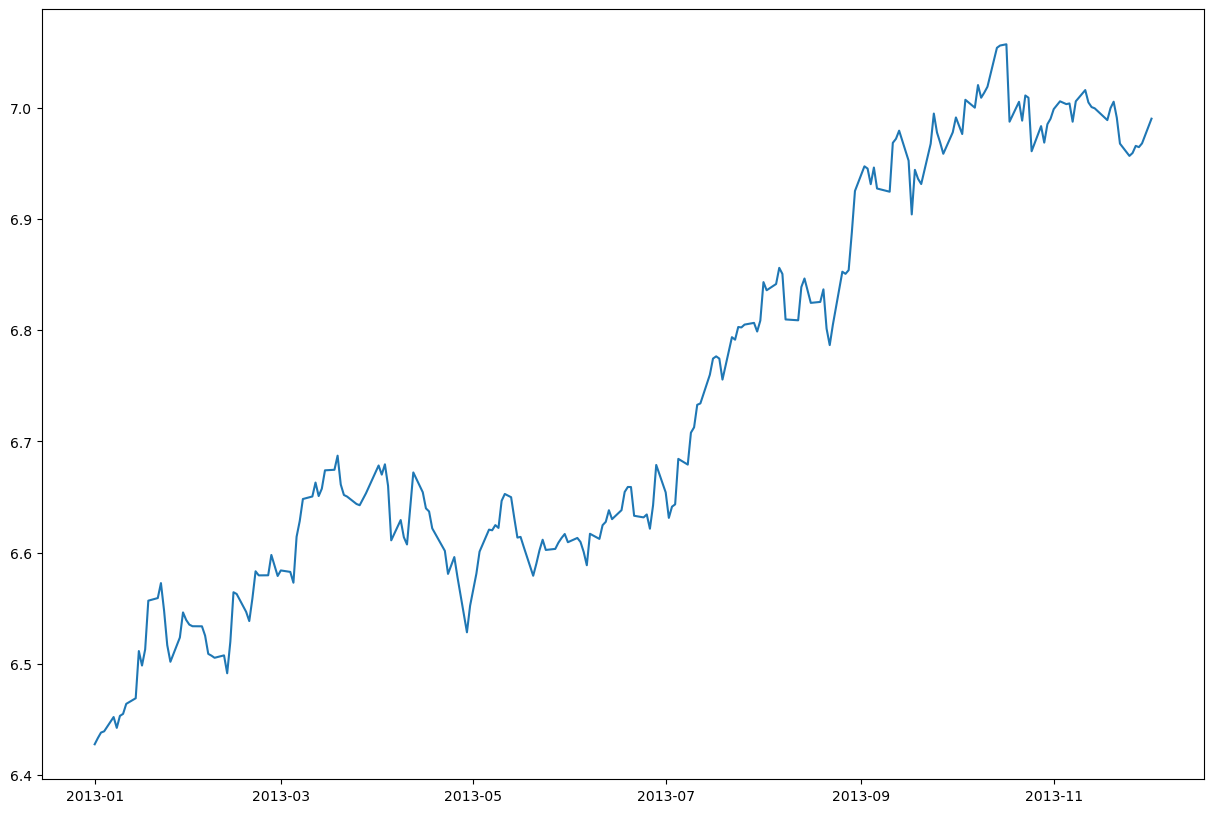

In [27]:
plt.figure(figsize=(15,10))
plt.plot(logTransform)

In [28]:
# From above, it can be seen that the log transformation is not making the time series stationary

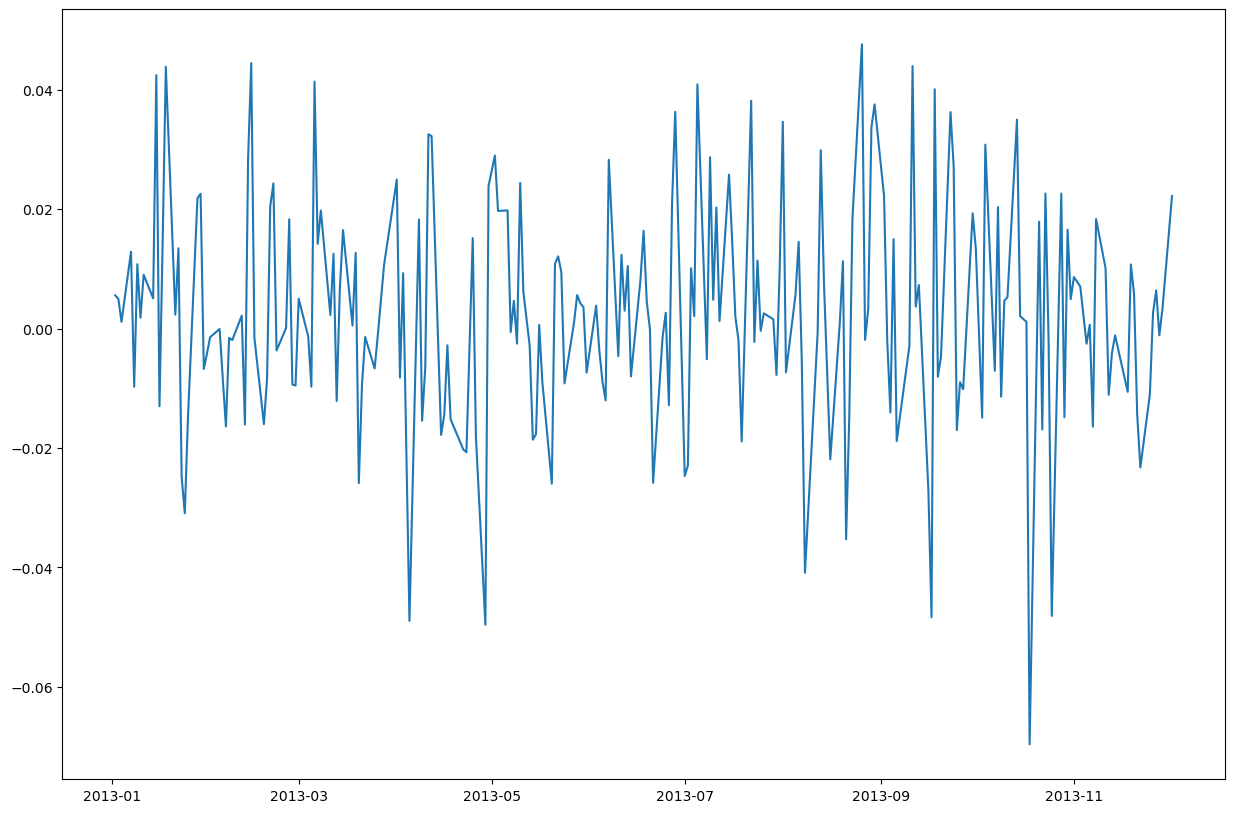

In [29]:
# Lets try differencing

plt.figure(figsize=(15,10))
logDifferencing= logTransform- logTransform.shift()
plt.plot(logDifferencing)

In [30]:
# Now lets determine the rolling statistics on this differenced data

In [31]:
rollingMean=logDifferencing.rolling(12).mean()
rollingSTD=logDifferencing.rolling(12).std()

In [32]:
# Lets plot all of them together to see whether the rooling mean and rolling STD has become constant or not

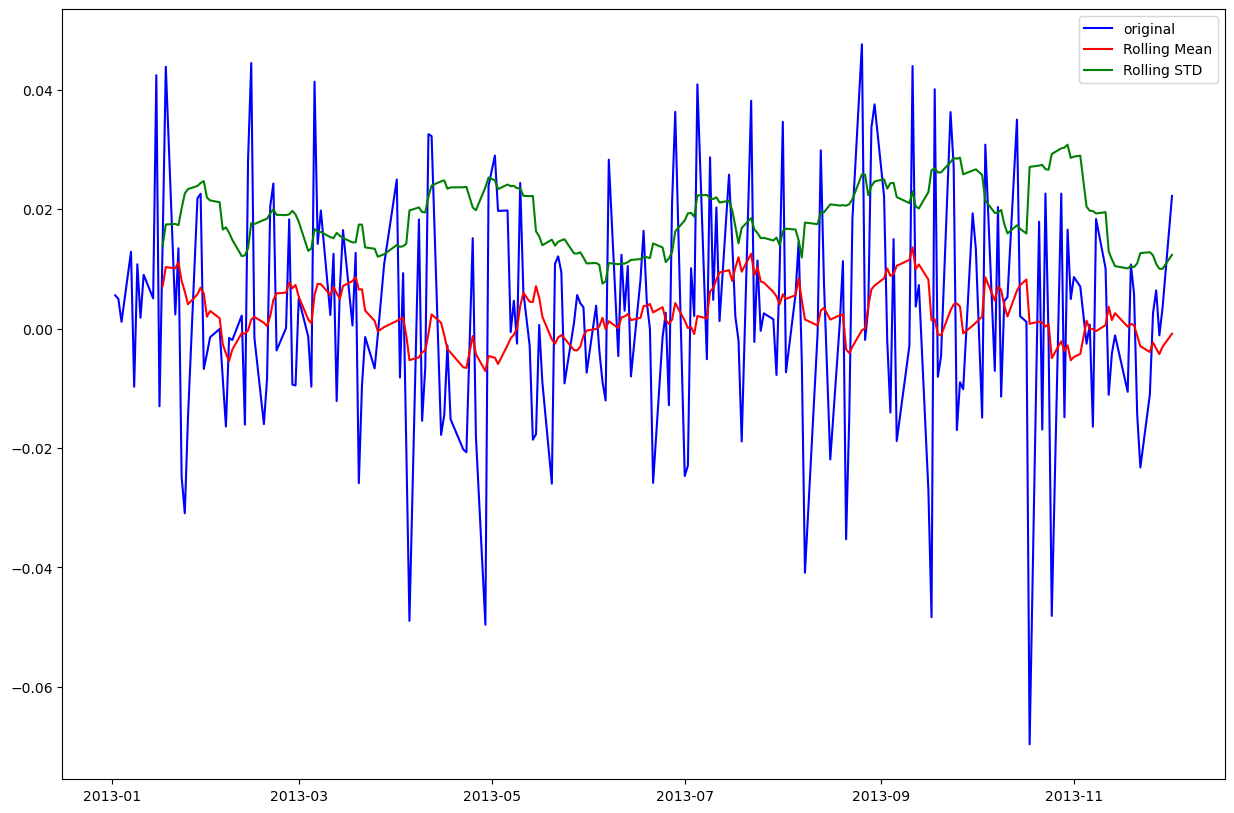

In [33]:
plt.figure(figsize=(15,10))

plt.plot(logDifferencing,color='blue',label='original')
plt.plot(rollingMean, color='red',label='Rolling Mean')
plt.plot(rollingSTD, color='green',label='Rolling STD')
plt.legend(loc='best')

In [34]:
# From the above, it can be seen that the rolling mean and rolling STD has become more or less constant, thus becoming a stationary time series data.

In [35]:
# Now lets build a model using ARIMA model

In [36]:
# Fist to determine the order of Auto Regression anf Moving Average lets use acf and pacf

In [37]:
from statsmodels.tsa.stattools import acf,pacf

In [38]:
lag_acf=acf(logDifferencing, nlags=20)

In [39]:
lag_pacf=pacf(logDifferencing, nlags=20)

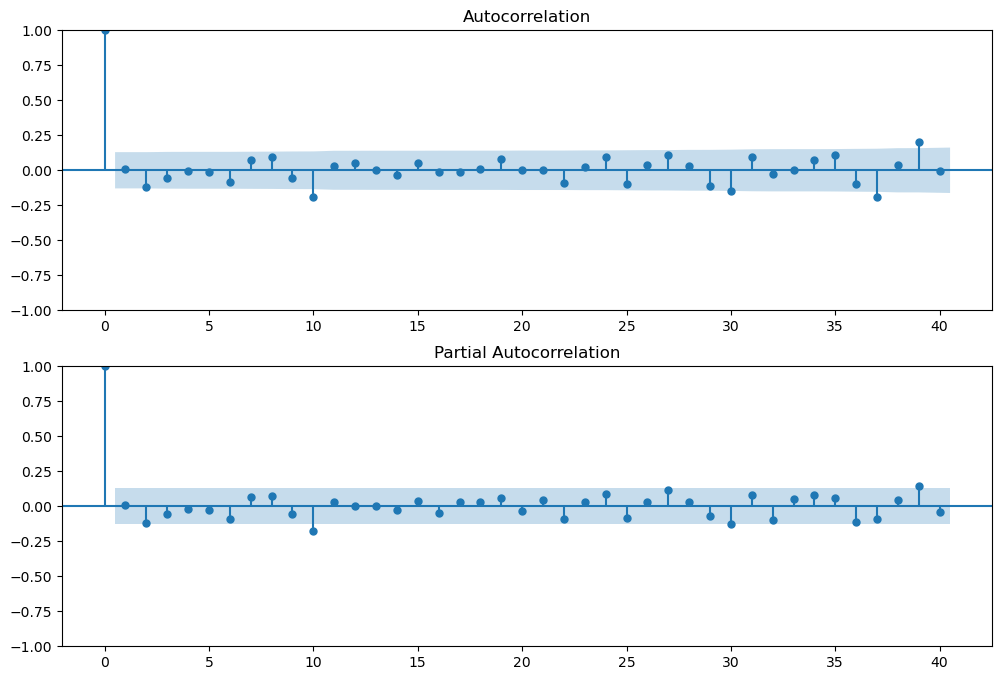

In [40]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(logDifferencing.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(logDifferencing.dropna(),lags=40,ax=ax2)

In [41]:
# The highlighted part is called confidence interval. 
# And the first line that crosses the chart is the line of your order.
# In both the charts acp and pacf line no. 2 is touching the tip of the chart

In [42]:
# So lets consider order of AR=2 and MA=2

In [43]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [44]:
logDifferencing = logDifferencing[~logDifferencing.isnull()]

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


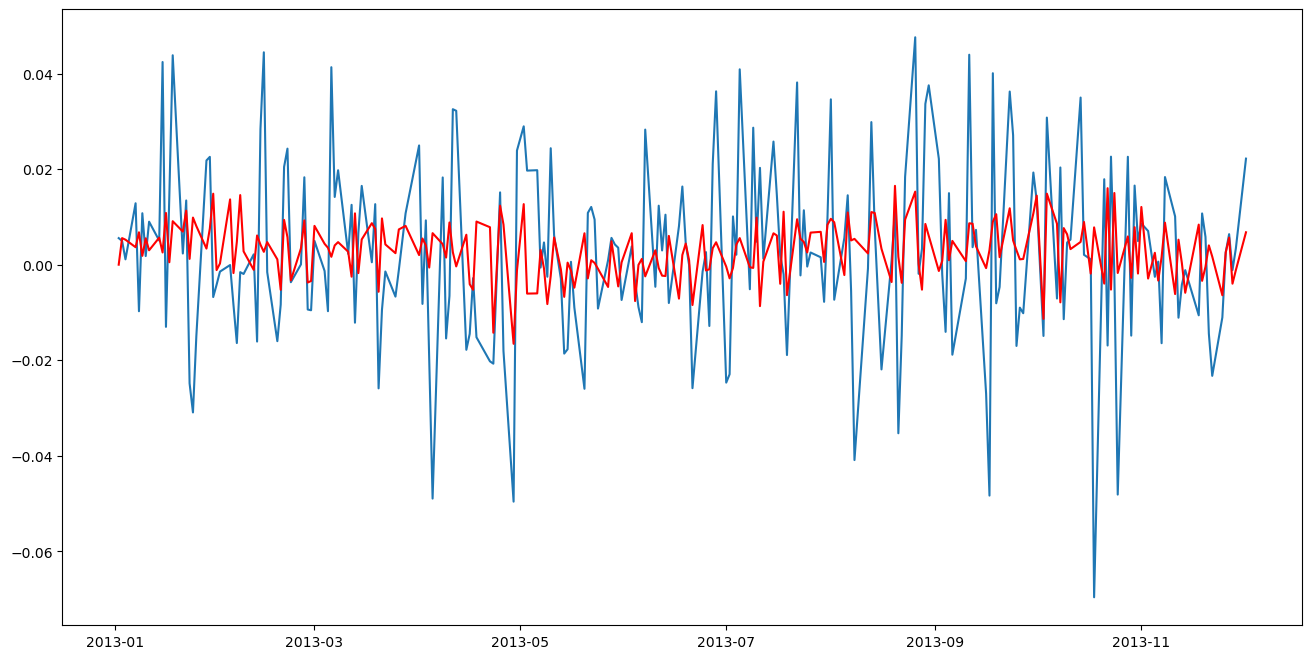

In [45]:
plt.figure(figsize=(16, 8))
model = SARIMAX(logDifferencing, order=(2, 1, 12))  
results_ARIMA = model.fit()  
plt.plot(logDifferencing)
plt.plot(results_ARIMA.fittedvalues, color='red')

In [46]:
# From above, it can be seen that the blue curve is the actual data and the red one is the fitted values i.e., the predicted line

In [47]:
# Now since, i have done many transformtion on the original data, so lets take back the result to original scale

In [48]:
# converting the fitted values in a series
ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(ARIMA_diff_predictions.head())

Date
2013-01-02    0.000000
2013-01-03    0.005561
2013-01-04    0.005234
2013-01-07    0.003661
2013-01-08    0.006787
dtype: float64


In [49]:
#Since, we have differenced the data, so lets find the cummulative sum

ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())

Date
2013-01-02    0.000000
2013-01-03    0.005561
2013-01-04    0.010795
2013-01-07    0.014455
2013-01-08    0.021242
dtype: float64


In [50]:
ARIMA_log_prediction = pd.Series(logTransform.iloc[0], index=logTransform.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)
ARIMA_log_prediction.head()

Date
2013-01-01    6.427621
2013-01-02    6.427621
2013-01-03    6.433181
2013-01-04    6.438415
2013-01-07    6.442076
dtype: float64

In [51]:
# To take back the log transformed data to original, we will use Exponential

plt.figure(figsize=(12,8))
predictions_ARIMA = np.exp(ARIMA_log_prediction)
predictions_ARIMA

Date
2013-01-01     618.700000
2013-01-02     618.700000
2013-01-03     622.150000
2013-01-04     625.414790
2013-01-07     627.708381
                 ...     
2013-11-26    1210.545506
2013-11-27    1217.425438
2013-11-28    1212.598375
2013-11-29    1211.217643
2013-12-02    1219.460001
Length: 230, dtype: float64

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'RMSE: 65.7412')

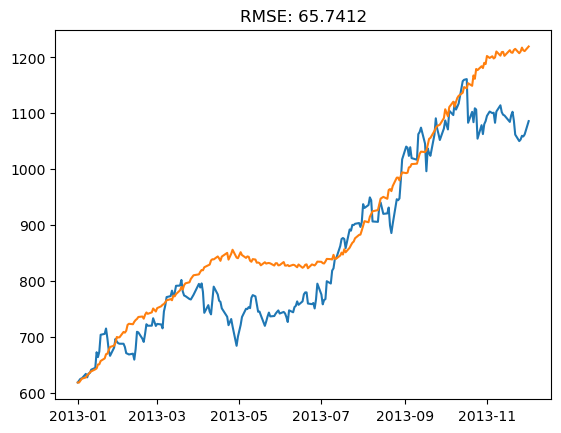

In [52]:
plt.plot(df)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-df)**2)/len(df)))

In [53]:
results_ARIMA.predict(10,15)

Date
2013-01-16    0.010831
2013-01-17    0.000509
2013-01-18    0.009104
2013-01-21    0.006930
2013-01-22    0.011311
2013-01-23    0.001216
Name: predicted_mean, dtype: float64

In [54]:
# Forecasting for a Single Date
forecast_date = '2023-12-31'  # Replace with the desired date
forecast_index = pd.to_datetime([forecast_date])  # Convert to DatetimeIndex
forecast = results_ARIMA.get_forecast(steps=1, dynamic=False, index=forecast_index)

In [55]:
# Inverse Differencing and Inverse Log Transformation
last_observed_value = df.iloc[-1]
forecast_value_diff = np.exp(forecast.predicted_mean.values[0])
forecast_value_original = last_observed_value * forecast_value_diff
print(f"Forecasted Close Price for {forecast_date}: {forecast_value_original:.2f}")

Forecasted Close Price for 2023-12-31: 1077.98
